### High Level Qiskit Metal Overview


#### You'll use Qiskit Metal in 4 stages

1. Choose a design class to instantiate.
    
2. Add and modify pre-built components (qubits, coplanar wave guides, etc.) from the QComponent library to your design.
         
         
         
3. Render to Simulate & Analyze 
    * Current Rendering Options:
        * Ansys 
            * HFSS Renderer - for high frequency simulations (eigenmode, modal, terminal)
                * EPR Analysis - Uses eigenmode simulation to perform energy participation ratio analysis
            * Q3D Renderer - for extracting equivalent circuit values of a layout, such as capacitance
                * LOM Analysis - Uses the capacitance matrix from Q3D to determine the parameters of a transmon qubit
            
            
            
4.  Render for Fabrication
    * Current Rendering Options:
        * GDS 
        



These steps are shown visually below in the following diagram

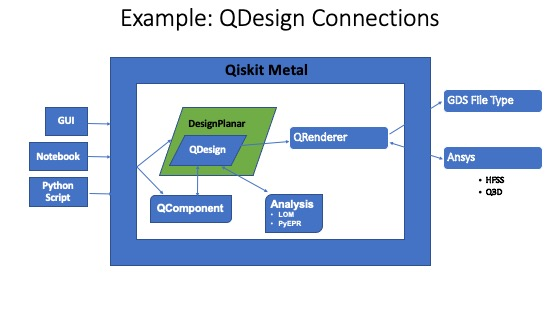

### *_This tutorial is for steps 1 and 2._*

### Using this Tutorial


Metal can be used three different ways: 
   * Jupyter Notebooks
        * For interactive code
        * To Use:
            1. Just press run :D 
   * Python scripts
       * For setting internal breakpoints
       * To Use: 
           1. Copy snippets of code from these Notebooks and save as a Python file. 
           2. Run in your favorite editor. (We like VS Code!)
   * Metal GUI
        * _In the future, we anticipate Metal GUI to have full functionality._
        * To Use: 
            1. You _must_ first use either Jupyter Notebooks or Python Scripts to add components to your QDesign. 
            2. Use the GUI to visualize and manually edit your components.


Let's dive in!


### QDesign (need-to-know)

Each time you create a new quantum circuit design, you start by instantiating a QDesign class. 

There are different design classes in the design library `qiskit_metal.designs` for different design layouts. For example the design class `DesignPlanar` is best for 2D circuit designs. 

Every design class (except `QDesign`) inherits from the base `QDesign` class. `QDesign` defines basic functionality for all other design classes and should not be directly instantiated. 

### QDesign (in-depth)

QDesign keeps track of each of the components (qubits, coplanar wave guides, etc.) that you add to your circuit and the relationships between them. 

As you can see below, QDesign keeps track of many things:

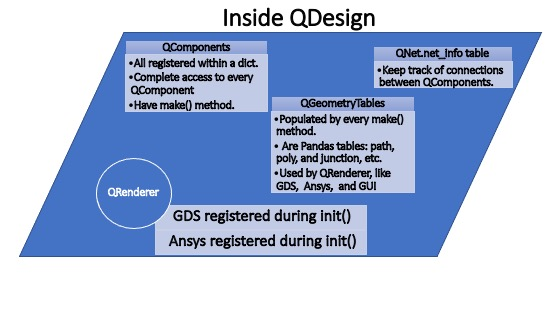


* QComponents - do *not* directly instantiate
    * Components of your design
    * Example:
        * Transmon Qubits
        * CPWs
        * etc.
    * Upon creation, the QComponent's `make` function runs and adds the QComponent's geometries (rectangles, line segments, etc.) to the QGeometryTables


* QGeometryTables - instantiate during init of QDesign
    * Stores backend information about components
    * Populated when QComponents are added to QDesign 
        
        
* QNet.net_info - instantiate during init of QDesign
    * Stores backend information on existing connections between components 
    * Instantiated in the backend by QDesign
    * Populated during connections of QComponents
    
* QRenderer - instantiate during init of QDesign
    * This is what allows you to export your designs into Ansys, GDS, etc.
    * `qiskit_metal/config.py` contains list of all instantiated renderers
    
    

# Coding Time!

Today we'll be creating a 2D design and adding a single qcomponent

So, let us dive right in. For convenience, let's begin by enabling [automatic reloading of modules](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) when they change.

In [1]:
%load_ext autoreload
%autoreload 2

## Import Qiskit Metal

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

Here, we import the folders designs, draw, MetalGUI, Dict, and open_docs from the qiskit_metal code.

## My First Quantum Design (QDesign)

Choose a design layout.
We will start with the simple planar QDesign.

In [3]:
design = designs.DesignPlanar()

Launch Qiskit Metal GUI to interactively view, edit, and simulate QDesign: Metal GUI

In [4]:
gui = MetalGUI(design)

In [5]:
%metal_heading Hello Quantum World!

## My First Quantum Component (QComponent)
### A transmon qubit
You can create a ready-made transmon qubit from the QComponent Library, `qiskit_metal.qlibrary.qubits`. 
`transmon_pocket.py` is the file containing our qubit so `transmon_pocket` is the module we import. 
The `TransmonPocket` class is our transmon qubit. Like all quantum components, `TransmonPocket` inherits from `QComponent` 

* Let's create a new qubit by creating an object of this class. 

In [6]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket


q1 = TransmonPocket(design, 'Q1', options=dict(connection_pads=dict(a=dict()))) # Create a new Transmon Pocket object with name 'Q1' 
gui.rebuild()  # rebuild the design and plot 

gui.edit_component('Q1') # set Q1 as the editable component 
gui.autoscale() #resize GUI to see QComponent

Let's see what the Q1 object looks like

In [7]:
q1 #print Q1 information

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0um',                        
  'pos_y'             : '0um',                        
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '125um',                      
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '100um',                      
            'pocket_extent'     : '5um',                        
            'pocket_rise'       : '65um',                       
            'loc_W'             : '+1',                         
            'loc_H'             : '+1',                         

#### What are the default options?
The QComponent comes with some default options like the length of the pads for our transmon pocket.
* Options are parsed internally by Qiskit Metal via the component's `make` function. 
* You can change option parameters from the gui or the script api. 

In [8]:
%metal_print How do I edit options?  API or GUI

You can now use the Metal GUI to edit, plot, and modify quantum components.
Equivalently, you can also do everything from the Jupyter Notebooks/Python scripts (which call the Python API directly).
The GUI is just calling the Python API for you.

*You must use a string when setting options!

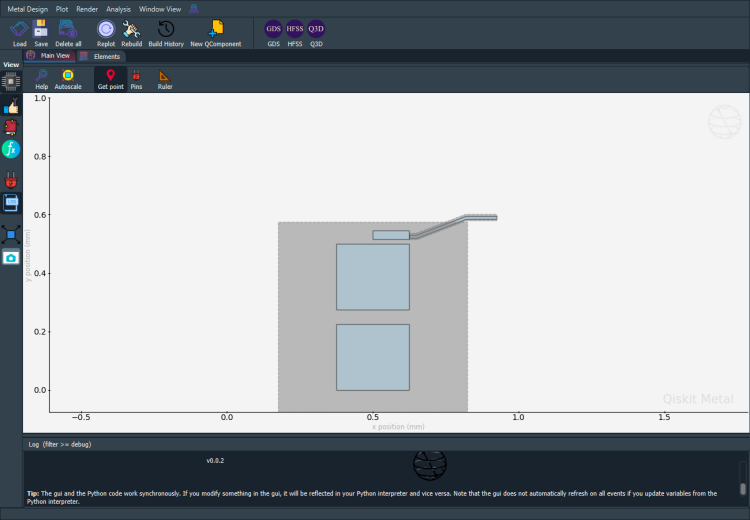

In [9]:
# Change options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width  = '250 um'
q1.options.pad_gap    = '50 um'

gui.rebuild() # Update the component geoemtry, since we changed the options
gui.autoscale() #resize GUI 
gui.screenshot()


## Closing the Qiskit Metal GUI

In [ ]:
gui.main_window.close()